# Ejercicio de programación Regresión Lineal (con mi dataset)

In [16]:
# Librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
# utilizado para manejos de directorios y rutas
import os
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

## 1 Regresión lineal con una variable

El archivo `realtor-data.csv` contiene el dataset para el problema de regresion lineal. La primera columna es la problacion de una ciudad (en 10,000s) y la segunda columna es el beneficio que genera un camion de comida en esa ciudad (en $10,000s). Un valor negativo indica una perdida.

In [38]:
# Leemos el archivos csv
df = pd.read_csv('poblacion_bolivia.csv')
df

,label,Total de población
0,2021,12079472
1,2020,11936162
2,2019,11777315
3,2018,11606905
4,2017,11435533
...,...,...
57,1964,4029472
58,1963,3945729
59,1962,3864140
60,1961,3784744


In [70]:
# sacamos los datos de nuestro uso en listas
lista_años = []
lista_poblacion = []

with open('poblacion_bolivia.csv', newline='') as archivo_csv:
    lector_csv = csv.reader(archivo_csv, delimiter=',')
    next(lector_csv)
    for fila in lector_csv:
        año = fila[0] # sacamos la columna label=año
        año_int = int(año) # convertinmos a enteros
        poblacion = fila[1] # sacamos la columna total poblacion
        poblacion_int = int(poblacion)
        lista_años.append(año_int)
        lista_poblacion.append(poblacion_int)




In [71]:
# Utilizamos la función map para dividir cada elemento del array por mil
for i in range(len(lista_años)):
    lista_años[i] /= 1000
# hacemos lo mismo para la poblacion por millon
for i in range(len(lista_poblacion)):
    lista_poblacion[i] /= 1000000

In [72]:
lista_poblacion

[12.079472,
 11.936162,
 11.777315,
 11.606905,
 11.435533,
 11.263015,
 11.090085,
 10.916987,
 10.743349,
 10.569697,
 10.396246,
 10.22327,
 10.051317,
 9.880593,
 9.711152,
 9.542663,
 9.377388,
 9.216279,
 9.057378,
 8.900583,
 8.746084,
 8.592656,
 8.439052,
 8.286928,
 8.137619,
 7.989367,
 7.841471,
 7.693722,
 7.544489,
 7.394419,
 7.244891,
 7.096194,
 6.949139,
 6.804072,
 6.661434,
 6.521983,
 6.38563,
 6.251926,
 6.12062,
 5.991118,
 5.86299,
 5.736088,
 5.61038,
 5.486132,
 5.363917,
 5.244355,
 5.127776,
 5.013765,
 4.902248,
 4.793804,
 4.688267,
 4.585693,
 4.486098,
 4.389249,
 4.295269,
 4.204065,
 4.115511,
 4.029472,
 3.945729,
 3.86414,
 3.784744,
 3.707515]

In [73]:
# transformamos a array las listas
arr_años = np.array(lista_años)
arr_poblacion = np.array(lista_poblacion)

In [74]:
arr_años

array([2.021, 2.02 , 2.019, 2.018, 2.017, 2.016, 2.015, 2.014, 2.013,
       2.012, 2.011, 2.01 , 2.009, 2.008, 2.007, 2.006, 2.005, 2.004,
       2.003, 2.002, 2.001, 2.   , 1.999, 1.998, 1.997, 1.996, 1.995,
       1.994, 1.993, 1.992, 1.991, 1.99 , 1.989, 1.988, 1.987, 1.986,
       1.985, 1.984, 1.983, 1.982, 1.981, 1.98 , 1.979, 1.978, 1.977,
       1.976, 1.975, 1.974, 1.973, 1.972, 1.971, 1.97 , 1.969, 1.968,
       1.967, 1.966, 1.965, 1.964, 1.963, 1.962, 1.961, 1.96 ])

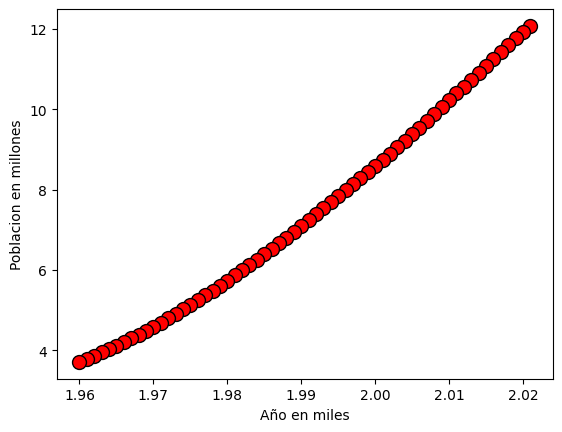

In [75]:
def plotData(x_axis, y_axis):
    #Grafica los puntos x e y en una figura nueva. 
    fig = plt.figure()  # abre una nueva figura
    
    plt.plot(x_axis, y_axis, 'ro', ms=10, mec='k')
    plt.ylabel('Poblacion en millones')
    plt.xlabel('Año en miles')

plotData(arr_años, arr_poblacion)

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion 
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [81]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

m = arr_años.size  # m = numero de ejemplos de entrenamiento
arr_años = np.stack([np.ones(m), arr_años], axis=1)

In [82]:
arr_años

array([[1.   , 2.021],
       [1.   , 2.02 ],
       [1.   , 2.019],
       [1.   , 2.018],
       [1.   , 2.017],
       [1.   , 2.016],
       [1.   , 2.015],
       [1.   , 2.014],
       [1.   , 2.013],
       [1.   , 2.012],
       [1.   , 2.011],
       [1.   , 2.01 ],
       [1.   , 2.009],
       [1.   , 2.008],
       [1.   , 2.007],
       [1.   , 2.006],
       [1.   , 2.005],
       [1.   , 2.004],
       [1.   , 2.003],
       [1.   , 2.002],
       [1.   , 2.001],
       [1.   , 2.   ],
       [1.   , 1.999],
       [1.   , 1.998],
       [1.   , 1.997],
       [1.   , 1.996],
       [1.   , 1.995],
       [1.   , 1.994],
       [1.   , 1.993],
       [1.   , 1.992],
       [1.   , 1.991],
       [1.   , 1.99 ],
       [1.   , 1.989],
       [1.   , 1.988],
       [1.   , 1.987],
       [1.   , 1.986],
       [1.   , 1.985],
       [1.   , 1.984],
       [1.   , 1.983],
       [1.   , 1.982],
       [1.   , 1.981],
       [1.   , 1.98 ],
       [1.   , 1.979],
       [1. 

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [83]:
def computeCost(x, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento
   
    J = 0
    h = np.dot(x, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(x, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$. 

In [84]:
J = computeCost(arr_años, arr_poblacion, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
# print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = computeCost(arr_años, arr_poblacion, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
# print('Valor de costo esperado (aproximadamente)  54.24')

Con theta = [0, 0] 
 Costo calculado = 30.67
Con theta = [-1, 2]
 Costo calculado = 12.92


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso. 

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [85]:
def gradientDescent(x, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    
    # hace una copia de theta, para evitar cambiar la matriz original, 
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()
    
    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(x, theta) - y).dot(x)
        # save the cost J in every iteration
        J_history.append(computeCost(x, y, theta))
    
    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [117]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 150000
alpha = 0.37

theta, J_history = gradientDescent(arr_años ,arr_poblacion, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
#print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

Theta encontrada por descenso gradiente: -264.4896, 136.6012


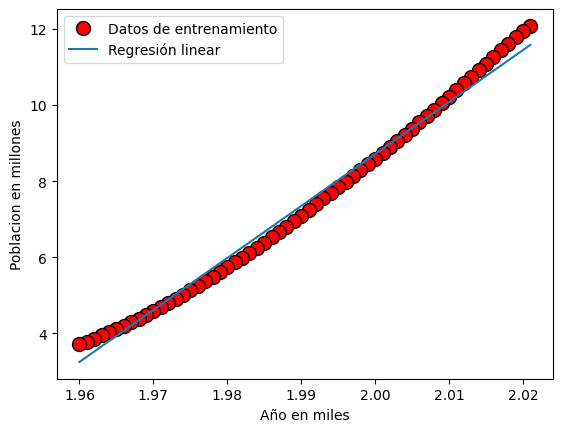

In [118]:
# grafica la linea de ajuste
plotData(arr_años[:, 1], arr_poblacion)
plt.plot(arr_años[:, 1], np.dot(arr_años, theta), '-')
plt.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [119]:
# Predecir la cantidad de poblacion para el 2030 y 2050
predict1 = np.dot([1, 2.030], theta)
print('Para el año 2030, se predice una poblacion de {:.0f}\n'.format(predict1*1000000))

predict2 = np.dot([1, 2.050], theta)
print('Para el año 2050, se predice una poblacion de {:.0f}\n'.format(predict2*1000000))

Para el año 2030, se predice una poblacion de 12810842

Para el año 2050, se predice una poblacion de 15542866



### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$. 

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

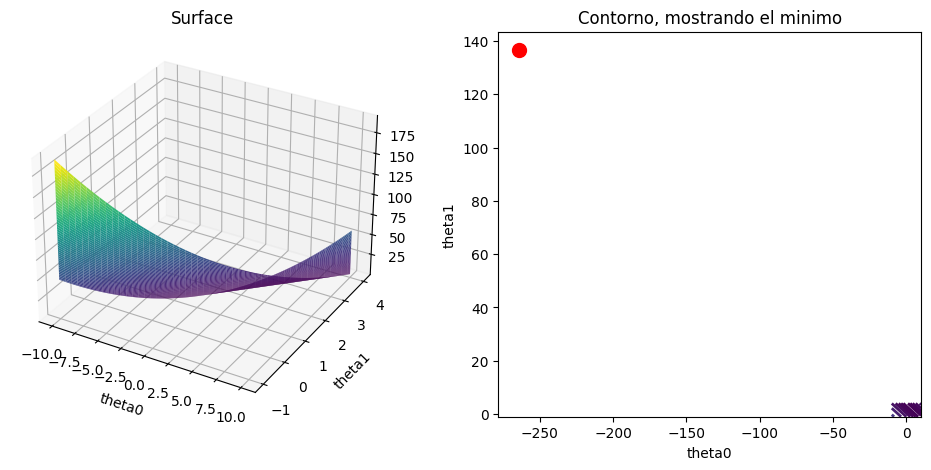

In [121]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(arr_años, arr_poblacion, [theta0, theta1])
        
# Debido a la forma en que funcionan las cuadrículas en el comando surf, 
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contorno, mostrando el minimo')
pass